In [2]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [60]:
dts = np.logspace(-4,2,200)
er_whfast = np.zeros(len(dts))
er_whfastc = np.zeros(len(dts))
ec_whfast = np.zeros(len(dts))
ec_whfastc = np.zeros(len(dts))
ec_ias15 = np.zeros(len(dts))
for i, dt in enumerate(dts):
    dt, er_whfast[i], ec_ias15[i], ec_whfast[i]  = [float(c) for c in subprocess.run(['./rebound', '%.6f'%dt], stdout=subprocess.PIPE).stdout.decode("ascii").split()]
    dt, er_whfastc[i], ec_ias15[i], ec_whfastc[i]  = [float(c) for c in subprocess.run(['./rebound', '%.6f'%dt, "1"], stdout=subprocess.PIPE).stdout.decode("ascii").split()]

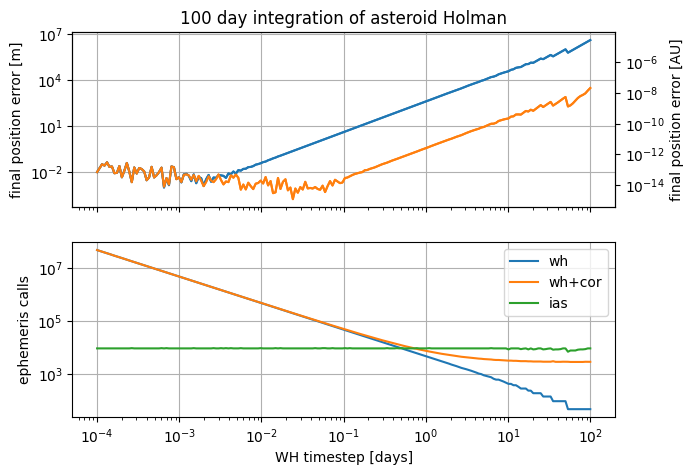

In [62]:
fig, axs = plt.subplots(2,1,sharex=True,figsize=(7,5))
axs[0].set_title("100 day integration of asteroid Holman")
axs[0].set_ylabel("final position error [m]")
axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].grid()
axs[0].plot(dts,er_whfast*1.4959787e+11,label="wh")
axs[0].plot(dts,er_whfastc*1.4959787e+11,label="wh+cor")
tx = axs[0].twinx()
tx.plot(dts,er_whfast)
tx.plot(dts,er_whfastc)
tx.set_yscale("log")
tx.set_ylabel("final position error [AU]")

axs[1].set_yscale("log")
axs[1].set_ylabel("ephemeris calls")
axs[1].set_xlabel("WH timestep [days]")
axs[1].plot(dts,ec_whfast,label="wh")
axs[1].plot(dts,ec_whfastc,label="wh+cor")
axs[1].plot(dts,ec_ias15,label="ias")
axs[1].legend()
axs[1].grid()

Text(0, 0.5, 'final position error [AU]')

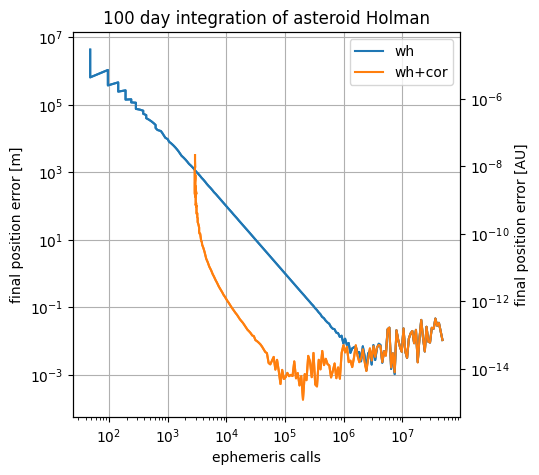

In [80]:
fig, axs = plt.subplots(1,1,sharex=True,figsize=(5,5))
axs.set_title("100 day integration of asteroid Holman")
axs.set_ylabel("final position error [m]")
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlabel("ephemeris calls")
axs.grid()
axs.plot(ec_whfast,er_whfast*1.4959787e+11,label="wh")
axs.plot(ec_whfastc,er_whfastc*1.4959787e+11,label="wh+cor")
axs.legend()
tx = axs.twinx()
tx.plot(ec_whfast,er_whfast,label="wh")
tx.plot(ec_whfastc,er_whfastc,label="wh+cor")
tx.set_yscale("log")
tx.set_ylabel("final position error [AU]")
